# **Churn Prediction and Retention Techniques**

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
df = pd.read_csv('churn_prediction.csv')

In [69]:
df.shape

(7032, 42)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   float64
 6   PhoneService                             7032 non-null   int64  
 7   PaperlessBilling                         7032 non-null   int64  
 8   MonthlyCharges                           7032 non-null   float64
 9   TotalCharges                             7032 non-null   float64
 10  Churn                                    7032 no

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

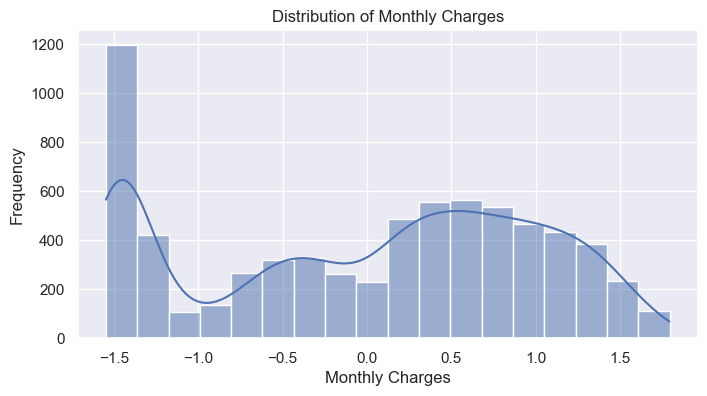

In [72]:
# Create a histogram for MonthlyCharges
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

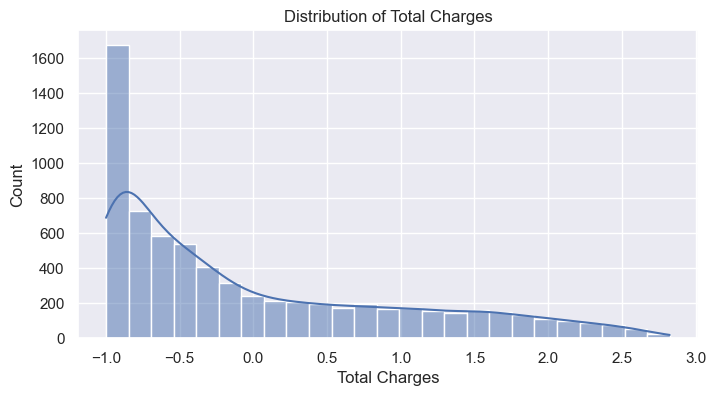

In [73]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='TotalCharges', kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.show()


In [74]:
df = df.drop(['Unnamed: 0'], axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 no

# **Selection of Possible Algorithms**
### As it will Guide the Standarization Technique

# **Model Selection**
1. **Logistic Regression**: It's a good starting point for binary classification problems and can serve as a baseline model.
2. **Decision Trees and Random Forest**: These can handle a mix of feature types and can provide insights into feature importance.
3. **Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost)**: Gradient boosting algorithms are powerful and often perform well on classification tasks.
4. **Support Vector Machines (SVM)**: SVMs can be effective for binary classification and can handle both numerical and categorical data.

# **Standarization Technique**
1. **Z-Score Standarization 
    Method**: 
    Subtract the mean and divide by the standard deviation of the feature.
    Suitable for: Linear models like Linear Regression, Logistic Regression, Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), Principal Component Analysis (PCA).
2. **Robust Scaling (RobustScaler)**:
    Method: Scale features using the median and the interquartile range (IQR) to handle outliers.
    Suitable for: Models where robustness against outliers is required, such as Decision Trees, Random Forests, and Gradient Boosting.

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['MonthlyCharges']] = scaler.fit_transform(df[['MonthlyCharges']])
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']])

In [77]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


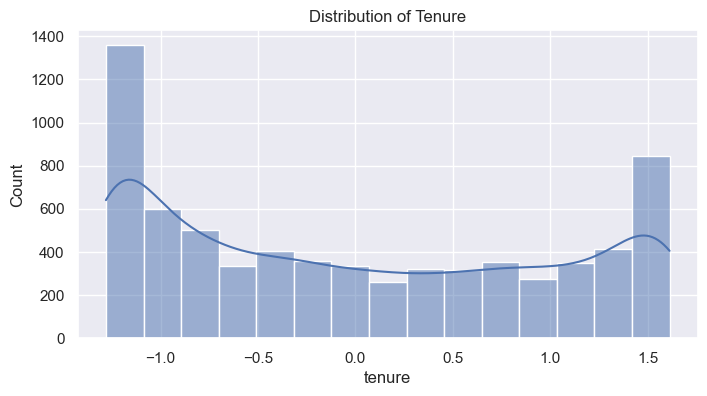

In [78]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('tenure')
plt.show()

In [79]:
df[['tenure']] = scaler.fit_transform(df[['tenure']])

In [80]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [81]:
categorical_columns = ['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [82]:
df[categorical_columns] = df[categorical_columns].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 no

In [86]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [87]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


# **Target Variable**
1. **SMOTE** (Oversampling):
2. **Class Weighting**

In [35]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [36]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Churn'], axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [38]:
X_resampled.shape

(10326, 40)

In [39]:
y_resampled.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [40]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn'] = y_resampled

In [41]:
df_resampled.shape

(10326, 41)

# **Feature Selection - Correlation Analysis**
1. PCA
2. Correlation Analysis
3. Mutual Information
4. Univariate Feature Selection

In [42]:
df_ttemp = df_resampled.copy()

# **PCA**

In [43]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

In [44]:
df_ttemp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1


In [45]:
X_scaled = df_ttemp.drop(['Churn'], axis=1)
y_scaled = df_ttemp['Churn']

In [46]:
X_pca = pca.fit_transform(X_scaled)

In [47]:
X_pca.shape

(10326, 18)

In [48]:
pca.explained_variance_

array([2.8647005 , 2.09489282, 0.76597706, 0.43528586, 0.37098747,
       0.30935242, 0.28316997, 0.27820954, 0.24967166, 0.24706645,
       0.2325392 , 0.22479285, 0.2145679 , 0.19083436, 0.17858611,
       0.17157354, 0.15423105, 0.13467247])

In [49]:
pca.explained_variance_ratio_

array([0.29128071, 0.21300721, 0.077884  , 0.04425956, 0.03772174,
       0.03145473, 0.02879252, 0.02828815, 0.02538644, 0.02512154,
       0.02364442, 0.02285678, 0.02181711, 0.0194039 , 0.01815851,
       0.01744548, 0.0156821 , 0.0136934 ])

In [50]:
pca.n_components_

18

In [51]:
cumulative_explained_variance = pca.explained_variance_.cumsum()
cumulative_explained_variance

array([2.8647005 , 4.95959333, 5.72557039, 6.16085624, 6.53184371,
       6.84119613, 7.1243661 , 7.40257564, 7.6522473 , 7.89931375,
       8.13185295, 8.3566458 , 8.5712137 , 8.76204806, 8.94063417,
       9.11220771, 9.26643876, 9.40111123])

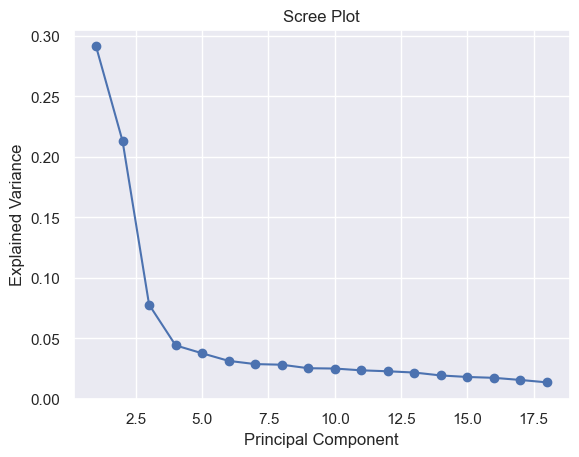

In [52]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [53]:
loadings = pca.components_
first_pc_loadings = loadings[0]  # Loadings for the first principal component
top_features_indices = abs(first_pc_loadings).argsort()[::-1]  # Sort by absolute value
top_features = df_ttemp.columns[top_features_indices]  # Assumes df is your DataFrame

In [54]:
X_pca.ndim

2

# **Correlation Matrix**

In [39]:
correlation_matrix = df_ttemp.corr()
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_DSL.1,InternetService_Fiber optic.1,InternetService_No.1,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
gender,1.000000,0.000826,0.028192,0.023507,0.043443,-0.005729,-0.014677,-0.027987,0.028866,-0.000737,0.005795,0.003832,0.014030,-0.033359,0.027647,0.014030,-0.033359,0.027647,-0.009213,0.027647,-0.009576,-0.009727,0.027647,-0.006411,-0.025412,0.027647,0.009519,-0.015241,0.027647,0.001504,-0.011223,0.027647,-0.004469,-0.009210,0.027647,-0.007973,-0.031980,0.021604,0.026414,-0.000646,0.006999,-0.003654,0.029820,-0.076263
SeniorCitizen,0.000826,1.000000,0.018117,-0.184126,0.024889,0.012794,0.143921,0.197603,0.091144,-0.142681,-0.010674,0.157777,-0.115131,0.224362,-0.158975,-0.115131,0.224362,-0.158975,0.155513,-0.158975,-0.046702,0.073376,-0.158975,0.044357,0.066323,-0.158975,0.054464,0.185109,-0.158975,-0.068649,0.025713,-0.158975,0.094816,0.015834,-0.158975,0.101700,0.122346,-0.048986,-0.096494,-0.030520,-0.025362,0.160743,-0.136521,0.093949
Partner,0.028192,0.018117,1.000000,0.463027,0.410433,0.013863,-0.029103,0.073941,0.345939,-0.121681,-0.015264,0.138112,-0.001144,-0.028780,0.039770,-0.001144,-0.028780,0.039770,-0.166212,0.039770,0.165188,-0.159416,0.039770,0.144859,-0.181644,0.039770,0.166490,-0.147233,0.039770,0.149157,-0.137194,0.039770,0.110556,-0.143412,0.039770,0.119652,-0.313921,0.133460,0.267615,0.127183,0.102975,-0.101686,-0.063874,-0.249549
Dependents,0.023507,-0.184126,0.463027,1.000000,0.204459,0.007477,-0.122541,-0.134280,0.098709,0.041502,-0.005597,-0.031076,0.067809,-0.193652,0.176068,0.067809,-0.193652,0.176068,-0.216001,0.176068,0.114119,-0.163313,0.176068,0.044427,-0.158903,0.176068,0.033759,-0.210499,0.176068,0.105007,-0.100989,0.176068,-0.026020,-0.088355,0.176068,-0.041780,-0.273263,0.110246,0.242606,0.079177,0.091100,-0.178443,0.085245,-0.271364
tenure,0.043443,0.024889,0.410433,0.204459,1.000000,0.013620,-0.011153,0.225185,0.856227,-0.314416,-0.013575,0.322537,0.009997,-0.016872,0.009939,0.009997,-0.016872,0.009939,-0.302417,0.009939,0.348948,-0.354744,0.009939,0.381495,-0.343252,0.009939,0.361796,-0.301977,0.009939,0.344472,-0.277692,0.009939,0.274564,-0.288247,0.009939,0.282344,-0.663465,0.280007,0.556956,0.255863,0.262652,-0.232963,-0.182572,-0.419648
PhoneService,-0.005729,0.012794,0.013863,0.007477,0.013620,1.000000,0.024357,0.307784,0.118102,0.301216,-0.991514,0.280252,-0.483389,0.340695,0.143622,-0.483389,0.340695,0.143622,-0.041931,0.143622,-0.070010,-0.063824,0.143622,-0.032552,-0.062075,0.143622,-0.045178,-0.043324,0.143622,-0.068223,-0.103435,0.143622,0.003817,-0.082436,0.143622,-0.015112,0.002518,0.000552,0.004692,0.014367,0.000343,0.008019,-0.002672,0.013554
PaperlessBilling,-0.014677,0.143921,-0.029103,-0.122541,-0.011153,0.024357,1.000000,0.341246,0.122175,-0.162319,-0.023539,0.173186,-0.100443,0.323902,-0.311592,-0.100443,0.323902,-0.311592,0.261136,-0.311592,-0.039537,0.132662,-0.311592,0.101087,0.152267,-0.311592,0.082839,0.230532,-0.311592,-0.002212,0.021992,-0.311592,0.212526,0.046517,-0.311592,0.185571,0.170516,-0.067449,-0.148958,-0.042019,-0.040318,0.211776,-0.208546,0.191831
MonthlyCharges,-0.027987,0.197603,0.073941,-0.134280,0.225185,0.307784,0.341246,1.000000,0.

# **Mutual Information**

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

k = 20
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = mi_selector.fit_transform(X_resampled, y_resampled)

selected_feature_indices = mi_selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]
print(selected_feature_names)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'InternetService_Fiber optic.1', 'InternetService_No.1',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


In [41]:
mi_scores = mi_selector.scores_

feature_mi_pairs = list(zip(selected_feature_names, mi_scores))

sorted_feature_mi_pairs = sorted(feature_mi_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_names, sorted_mi_scores = zip(*sorted_feature_mi_pairs)

for feature, mi_score in sorted_feature_mi_pairs:
    print(f"Feature: {feature}, MI Score: {mi_score:.4f}")

Feature: InternetService_No, MI Score: 0.2993
Feature: OnlineSecurity_No, MI Score: 0.1272
Feature: Contract_Two year, MI Score: 0.0782
Feature: StreamingMovies_No internet service, MI Score: 0.0684
Feature: TechSupport_No, MI Score: 0.0664
Feature: OnlineSecurity_No internet service, MI Score: 0.0536
Feature: TechSupport_No internet service, MI Score: 0.0482
Feature: Contract_Month-to-month, MI Score: 0.0475
Feature: PaymentMethod_Electronic check, MI Score: 0.0429
Feature: InternetService_Fiber optic, MI Score: 0.0388
Feature: TotalCharges, MI Score: 0.0357
Feature: InternetService_No.1, MI Score: 0.0159
Feature: tenure, MI Score: 0.0126
Feature: DeviceProtection_No internet service, MI Score: 0.0104
Feature: StreamingTV_No internet service, MI Score: 0.0072
Feature: OnlineBackup_No, MI Score: 0.0068
Feature: MonthlyCharges, MI Score: 0.0036
Feature: DeviceProtection_No, MI Score: 0.0018
Feature: InternetService_Fiber optic.1, MI Score: 0.0000
Feature: OnlineBackup_No internet servic

# **Selection of Possible Algorithms**
### As it will Guide the Standarization Technique

# **Model Selection**
1. **Logistic Regression**: It's a good starting point for binary classification problems and can serve as a baseline model.
2. **Decision Trees and Random Forest**: These can handle a mix of feature types and can provide insights into feature importance.
3. **Gradient Boosting (e.g., XGBoost, LightGBM, AdaBoost)**: Gradient boosting algorithms are powerful and often perform well on classification tasks.
4. **Support Vector Machines (SVM)**: SVMs can be effective for binary classification and can handle both numerical and categorical data.

## **Exploratory Data Analysis (EDA)**

In [42]:
df_eda = df_resampled.copy()

from pandas_profiling import ProfileReport

report = ProfileReport(df_eda)
report.to_file("report.html")
report.to_notebook_iframe()

# **Modeling**

In [58]:
df_resampled.shape

(10326, 41)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [60]:
X_train.shape, X_valid.shape, X_test.shape

((6195, 40), (2065, 40), (2066, 40))

# **Model Training**[](http://)

## **Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000).fit(X_train, y_train)

In [59]:
model_lr.classes_

array([0, 1], dtype=int64)

In [60]:
model_lr.coef_

array([[-0.22911198, -0.0517679 , -0.14850572, -0.50995645, -1.74159927,
         0.07707751,  0.06453723,  1.42939775,  0.96528343, -2.58152892,
        -1.03121556, -2.60770242,  0.11538134, -0.03322725, -1.46831739,
         0.11538134, -0.03322725, -1.46831739, -2.08750949, -1.46831739,
        -2.89802897, -2.40384971, -1.46831739, -2.84495597, -2.03090345,
        -1.46831739, -2.33925167, -2.34767343, -1.46831739, -3.20213413,
        -1.88715652, -1.46831739, -2.1510237 , -1.88571256, -1.46831739,
        -2.17233509, -1.69425828, -2.635923  , -3.15616717, -3.30127064,
        -3.51709747, -2.78449456, -3.3376384 ]])

In [61]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model_lr.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"The accuracy of Logistic Regression is: {accuracy}")

The accuracy of Logistic Regression is: 0.8261501210653753


In [62]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1059
           1       0.80      0.85      0.83      1006

    accuracy                           0.83      2065
   macro avg       0.83      0.83      0.83      2065
weighted avg       0.83      0.83      0.83      2065


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid to search for the best hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],          # Regularization penalty type
}


# Initialize GridSearchCV with logistic regression and parameter grid
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [64]:
# Train a new logistic regression model with the best parameters
best_logistic_reg = LogisticRegression(solver='lbfgs', max_iter=1000, **best_params)
best_logistic_reg.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_logistic_reg.predict(X_valid)

print(classification_report(y_valid, y_pred_best))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1059
           1       0.81      0.85      0.83      1006

    accuracy                           0.83      2065
   macro avg       0.83      0.83      0.83      2065
weighted avg       0.83      0.83      0.83      2065


## **Decision Trees**

In [65]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = decision_tree.predict(X_valid)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1059
           1       0.76      0.78      0.77      1006

    accuracy                           0.77      2065
   macro avg       0.77      0.77      0.77      2065
weighted avg       0.77      0.77      0.77      2065


In [67]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize GridSearchCV with decision tree and parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [68]:
# Train a new decision tree model with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_decision_tree.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1059
           1       0.76      0.78      0.77      1006

    accuracy                           0.77      2065
   macro avg       0.77      0.77      0.77      2065
weighted avg       0.77      0.77      0.77      2065


## **Random Forests**

In [70]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = random_forest.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1059
           1       0.82      0.87      0.84      1006

    accuracy                           0.84      2065
   macro avg       0.84      0.84      0.84      2065
weighted avg       0.84      0.84      0.84      2065


In [ ]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize GridSearchCV with Random Forest and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [84]:
best_params

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [73]:
# Train a new Random Forest model with the best parameters
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_random_forest.predict(X_valid)

print(classification_report(y_valid, y_pred_best))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1059
           1       0.81      0.86      0.83      1006

    accuracy                           0.83      2065
   macro avg       0.83      0.83      0.83      2065
weighted avg       0.84      0.83      0.83      2065


## **Gradient Boosting**

In [76]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()

xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
# Predict on the validation set
y_pred = xgboost_model.predict(X_valid)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1059
           1       0.82      0.85      0.84      1006

    accuracy                           0.84      2065
   macro avg       0.84      0.84      0.84      2065
weighted avg       0.84      0.84      0.84      2065


In [78]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds
    'max_depth': [3, 4, 5],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate
    'subsample': [0.7, 0.8, 0.9],          # Fraction of samples used for each boosting round
    'colsample_bytree': [0.7, 0.8, 0.9],   # Fraction of features used for each tree
    'reg_lambda': [0, 1, 10],              # L2 regularization term
    'reg_alpha': [0, 1, 10]                # L1 regularization term
}

# Initialize GridSearchCV with XGBoost and parameter grid
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [79]:
# Train a new XGBoost model with the best parameters
best_xgboost_model = xgb.XGBClassifier(**best_params)
best_xgboost_model.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_xgboost_model.predict(X_valid)

print(classification_report(y_valid, y_pred_best))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1059
           1       0.81      0.87      0.84      1006

    accuracy                           0.84      2065
   macro avg       0.84      0.84      0.84      2065
weighted avg       0.84      0.84      0.84      2065


In [87]:
best_xgboost_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## **SVM**

In [80]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [81]:
# Predict on the validation set
y_pred = svm_model.predict(X_valid)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1059
           1       0.81      0.84      0.82      1006

    accuracy                           0.82      2065
   macro avg       0.82      0.83      0.82      2065
weighted avg       0.83      0.82      0.82      2065


In [82]:
# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type (linear or radial basis function)
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf' kernel
}

# Initialize GridSearchCV with SVM and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [83]:
# Train a new SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

# Predict on the validation set with the tuned model
y_pred_best = best_svm_model.predict(X_valid)

print(classification_report(y_valid, y_pred_best))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1059
           1       0.82      0.85      0.83      1006

    accuracy                           0.83      2065
   macro avg       0.83      0.84      0.83      2065
weighted avg       0.84      0.83      0.83      2065


# Best Model

## XGBoost through Cross-Validation the best params

In [61]:
xgboost_best_params = {
    'objective': 'binary:logistic',
    'colsample_bytree': 0.7,
    'enable_categorical': False,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'subsample': 0.8}

In [62]:
import xgboost as xgb
xgb_model =  xgb.XGBClassifier(**xgboost_best_params)
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

xgb_y_pred = xgb_model.predict(X_valid)

print(classification_report(y_valid, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1059
           1       0.87      0.92      0.89      1006

    accuracy                           0.89      2065
   macro avg       0.89      0.89      0.89      2065
weighted avg       0.89      0.89      0.89      2065


Accuracy: 0.89
Precision: 0.87
Recall: 0.92
Specificity: 0.86
F1 Score: 0.89
AUC: 0.96


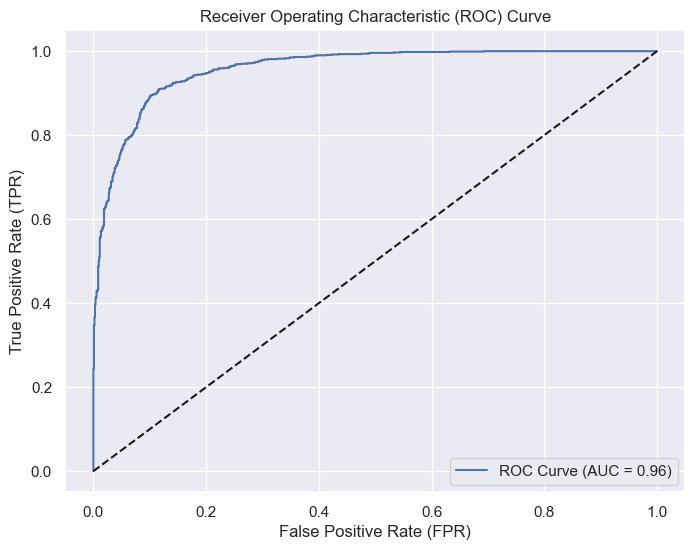

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Calculate and print accuracy
accuracy = accuracy_score(y_valid, xgb_y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_valid, xgb_y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_valid, xgb_y_pred)
print(f'Recall: {recall:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_valid, xgb_y_pred)

# Calculate specificity (True Negative Rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.2f}')

# Calculate and print F1 score
f1 = f1_score(y_valid, xgb_y_pred)
print(f'F1 Score: {f1:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, xgb_model.predict_proba(X_valid)[:, 1])

# Calculate and print AUC
auc = roc_auc_score(y_valid, xgb_model.predict_proba(X_valid)[:, 1])
print(f'AUC: {auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [65]:
import pickle
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# **Model Evaluation**

1. **Metrics**: Use appropriate evaluation metrics for binary classification, such as accuracy, precision, recall, F1-score, and ROC-AUC. The choice of metric depends on the importance of false positives and false negatives in your specific problem.

2. **Cross-Validation**: Use cross-validation to assess the generalization performance of your models and avoid overfitting.

3. **Hyperparameter Tuning**: Tune hyperparameters for each algorithm to optimize model performance.

4. **Model Interpretability**: Consider using techniques like SHAP (SHapley Additive exPlanations) or feature importance plots to interpret the model's decisions, especially if interpretability is important for your project.

5. **Ensemble Models**: Combine the predictions from multiple models to potentially improve performance.

In [ ]:
!pip install shap

[17:52:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


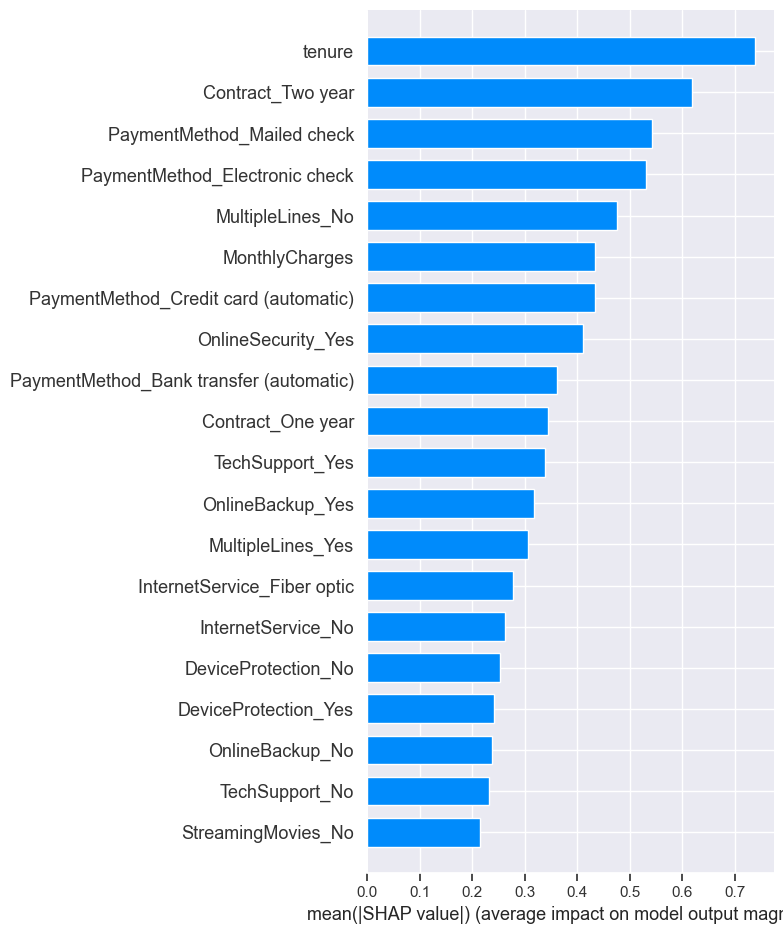

In [66]:
import shap

# Create an explainer for your model
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for your validation data
shap_values = explainer.shap_values(X_valid)

# Visualize SHAP summary plot for a specific prediction
shap.summary_plot(shap_values, X_valid, plot_type="bar", show=False)

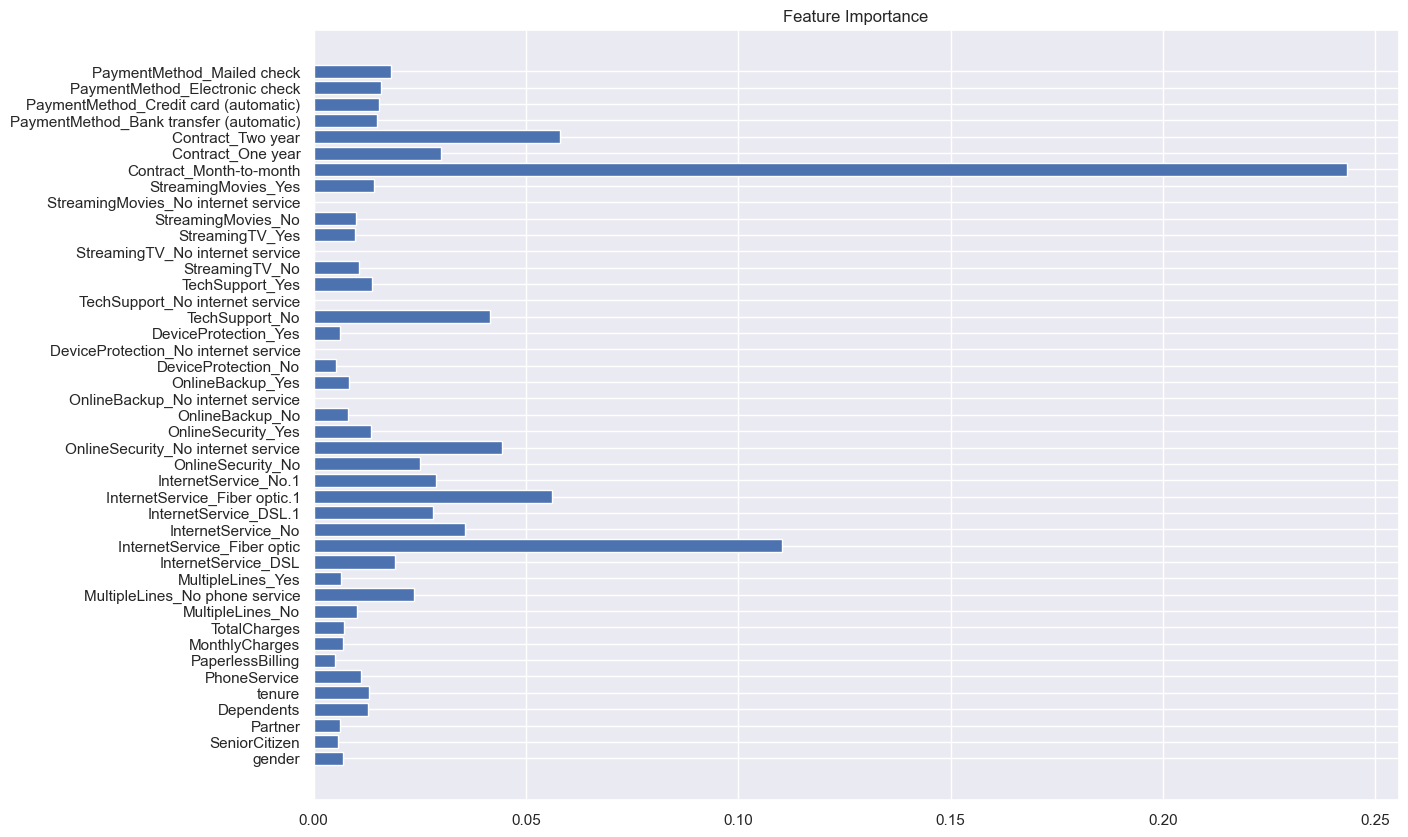

In [69]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(14, 10))
plt.barh(range(len(feature_importance)), feature_importance, tick_label=X_valid.columns)
plt.title("Feature Importance")
plt.show()

# Fine Tuning - PCA

In [49]:
X_resampled.shape , y_resampled.shape

((10326, 43), (10326,))

In [50]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_resampled)

In [51]:
X_pca.shape, y_resampled.shape

((10326, 18), (10326,))

In [52]:
df_pca = pd.DataFrame(X_pca)
df_pca['Churn'] = y_resampled

In [53]:
from sklearn.model_selection import train_test_split
X_ttrain, X_ttemp, y_ttrain, y_ttemp = train_test_split(X_pca, y_resampled, test_size=0.4, random_state=42)
X_vvalid, X_ttest, y_vvalid, y_ttest = train_test_split(X_ttemp, y_ttemp, test_size=0.5, random_state=42)

In [54]:
X_ttrain.shape, X_vvalid.shape, X_ttest.shape

((6195, 18), (2065, 18), (2066, 18))

In [55]:
import xgboost as xgb
xgb_model_pca =  xgb.XGBClassifier(**xgboost_best_params)
xgb_model_pca.fit(X_ttrain, y_ttrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
from sklearn.metrics import accuracy_score, classification_report
xgb_y_pred = xgb_model_pca.predict(X_vvalid)
print(classification_report(y_vvalid, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1059
           1       0.79      0.84      0.82      1006

    accuracy                           0.82      2065
   macro avg       0.82      0.82      0.82      2065
weighted avg       0.82      0.82      0.81      2065


Accuracy: 0.82
Precision: 0.79
Recall: 0.84
Specificity: 0.79
F1 Score: 0.82
AUC: 0.89


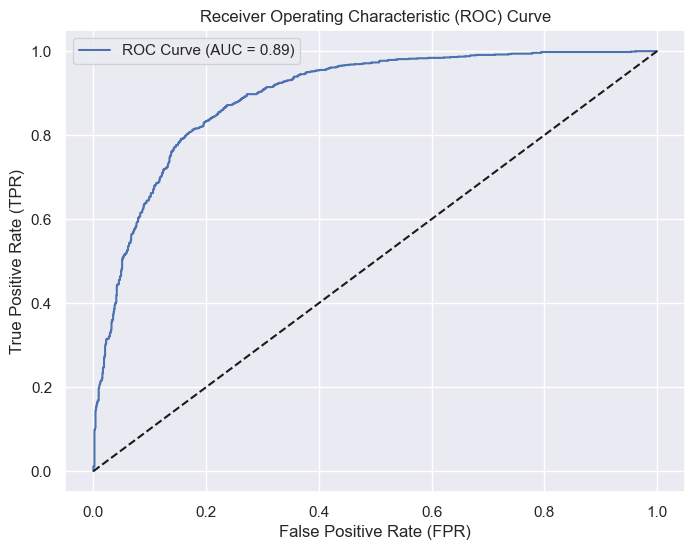

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Calculate and print accuracy
accuracy = accuracy_score(y_vvalid, xgb_y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_vvalid, xgb_y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_vvalid, xgb_y_pred)
print(f'Recall: {recall:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_vvalid, xgb_y_pred)

# Calculate specificity (True Negative Rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.2f}')

# Calculate and print F1 score
f1 = f1_score(y_vvalid, xgb_y_pred)
print(f'F1 Score: {f1:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_vvalid, xgb_model_pca.predict_proba(X_vvalid)[:, 1])

# Calculate and print AUC
auc = roc_auc_score(y_vvalid, xgb_model_pca.predict_proba(X_vvalid)[:, 1])
print(f'AUC: {auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Model Testing 

Accuracy: 0.82
Precision: 0.80
Recall: 0.85
Specificity: 0.79
F1 Score: 0.83
AUC: 0.89


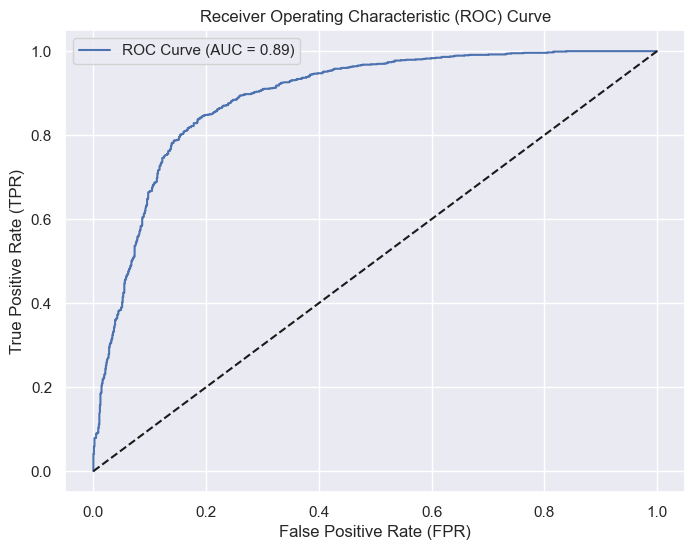

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_test, xgb_y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, xgb_y_pred)
print(f'Recall: {recall:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Calculate specificity (True Negative Rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.2f}')

# Calculate and print F1 score
f1 = f1_score(y_test, xgb_y_pred)
print(f'F1 Score: {f1:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_ttest)[:, 1])

# Calculate and print AUC
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_ttest)[:, 1])
print(f'AUC: {auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Deployment: FastAPI - Docker - Hostinger